In [2]:
#Making scatterplots of Obs versus RCM

In [2]:
import imp
imp.load_source('DataFns', "/glade/u/home/kwheelan/scripts/DataFns.py")
from DataFns import *

imp.load_source('StatFns', "/glade/u/home/kwheelan/scripts/StatFns.py")
from StatFns import *

import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import math
from scipy import interp

In [4]:
#all daily data
path="/glade/scratch/kwheelan/datasets/PNW_allyears.nc"
#just 6 years
ds = xr.open_mfdataset(path).sel(time = slice("1994-01-01", "1999-12-31"))

In [3]:
class Scatter(object):
    
    def __init__(self, points, ds, time_agg = False, space_agg = False):
        self.points = points
        if time_agg:
            self.data = ds.mean(dim = "time")
        elif space_agg:
            self.data = ds.mean(dim = ['latitude','longitude'])
        else:
            self.data = ds
        self.obs, self.rcm = [],[]
        self.time_agg, self.space_agg = time_agg, space_agg
            
    def getPoints(self):
        self.obs, self.rcm = [],[]
        for i in range(self.points):
            if not self.time_agg:
                time = np.random.randint(self.data.time.values.shape[0])
            elif not self.space_agg:
                lat = np.random.randint(self.data.latitude.values.shape[0])
                lon = np.random.randint(self.data.longitude.values.shape[0])
            if self.space_agg: index = "[time]"
            elif self.time_agg: index = "[lat,lon]"
            else: index = "[time, lat, lon]"
            self.obs += [eval("float(self.data.Prcp" + index + ".values)")]
            self.rcm += [eval("float(self.data.current" + index + ".values)")]
    
    def plot(self, scale=None, plotTitle = None):
        """Plot the points"""
        self.getPoints()
        fig, ax = plt.subplots()
        ax.scatter(self.obs, self.rcm, color = 'black', alpha = .5)
        if plotTitle is None: 
            plotTitle = "RCM versus observed precipitation"
        plt.title(plotTitle)
        plt.ylabel("RCM Precipitation")
        plt.xlabel("Observed Precipitation")
        if scale is None:
            scale = max(max(self.obs), max(self.rcm))+1
        line = mlines.Line2D([0, scale], [0, scale], color='red')
        ax.add_line(line)
        plt.ylim(ymax = scale, ymin = 0)
        plt.xlim(xmax = scale,  xmin = 0)
        plt.show()
        

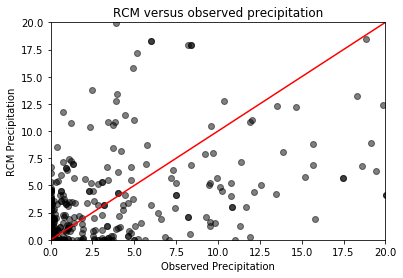

In [97]:
#Each point is a cell and time-step

Scatter(500, ds).plot(20)

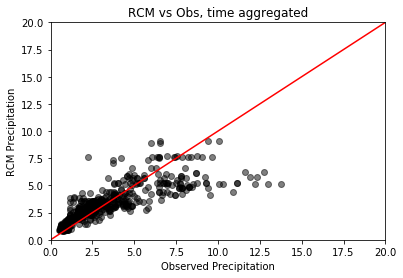

In [5]:
Scatter(500, ds, time_agg = True).plot(20, plotTitle = "RCM vs Obs, time aggregated")

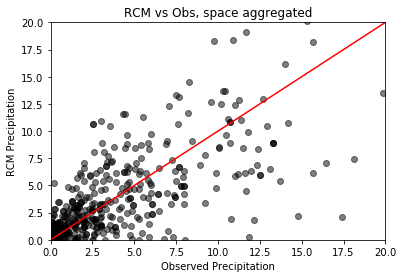

In [6]:
Scatter(500, ds, space_agg = True).plot(20, plotTitle = "RCM vs Obs, space aggregated")